# Introduce
* exploratory data analysis
* athour : Mr Hoanh
* according to dileepkumarg-sa: https://github.com/dileepkumarg-sa
* url project :

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
data_raw = pd.read_csv('../data/raw/insurance_claims.csv')

# overview data

In [3]:
data_raw.head()

,months_as_customer,total_claim_amount,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,71610,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,...,2,YES,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,5070,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,...,0,?,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,34650,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,...,3,NO,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,63400,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,...,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,6500,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,...,1,NO,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#demissions of data
data_raw.shape

(1000, 40)

In [5]:
#information of data
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   total_claim_amount           1000 non-null   int64  
 2   age                          1000 non-null   int64  
 3   policy_number                1000 non-null   int64  
 4   policy_bind_date             1000 non-null   object 
 5   policy_state                 1000 non-null   object 
 6   policy_csl                   1000 non-null   object 
 7   policy_deductable            1000 non-null   int64  
 8   policy_annual_premium        1000 non-null   float64
 9   umbrella_limit               1000 non-null   int64  
 10  insured_zip                  1000 non-null   int64  
 11  insured_sex                  1000 non-null   object 
 12  insured_education_level      1000 non-null   object 
 13  insured_occupation 

In [6]:
#describe data
data_raw.describe

<bound method NDFrame.describe of      months_as_customer  total_claim_amount  age  policy_number  \
0                   328               71610   48         521585   
1                   228                5070   42         342868   
2                   134               34650   29         687698   
3                   256               63400   41         227811   
4                   228                6500   44         367455   
..                  ...                 ...  ...            ...   
995                   3               87200   38         941851   
996                 285              108480   41         186934   
997                 130               67500   34         918516   
998                 458               46980   62         533940   
999                 456                5060   60         556080   

    policy_bind_date policy_state policy_csl  policy_deductable  \
0         2014-10-17           OH    250/500               1000   
1         2006-06-27       

In [7]:
#features of dataa
data_raw.columns

Index(['months_as_customer', 'total_claim_amount', 'age', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

## Feature description

In [8]:
def Feature_desciption(x):
    print(data_raw[x].value_counts())
    sns.countplot(x=x, data=data_raw, color='red')


insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: count, dtype: int64


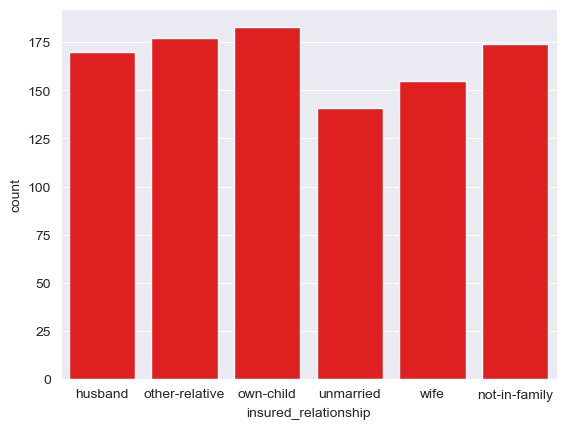

In [9]:
Feature_desciption("insured_relationship")

## convert non numeric into numeric

In [10]:
le = LabelEncoder()
data_raw.dtypes

months_as_customer               int64
total_claim_amount               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location        

In [11]:
#convert non numeric into numeric
data_raw['insured_sex'] = le.fit_transform(data_raw['insured_sex'])
data_raw['insured_relationship'] = le.fit_transform(data_raw['insured_relationship'])
data_raw['incident_type'] = le.fit_transform(data_raw['incident_type'])
data_raw['policy_state'] = le.fit_transform(data_raw['policy_state'])
data_raw['insured_education_level'] = le.fit_transform(data_raw['insured_education_level'])
data_raw['insured_occupation'] = le.fit_transform(data_raw['insured_occupation'])
data_raw['insured_hobbies'] = le.fit_transform(data_raw['insured_hobbies'])
data_raw['insured_relationship'] = le.fit_transform(data_raw['insured_relationship'])
data_raw['collision_type'] = le.fit_transform(data_raw['collision_type'])
data_raw['incident_severity'] = le.fit_transform(data_raw['incident_severity'])
data_raw['authorities_contacted'] = le.fit_transform(data_raw['authorities_contacted'])

data_raw['incident_state'] = le.fit_transform(data_raw['incident_state'])
data_raw['incident_city'] = le.fit_transform(data_raw['incident_city'])
data_raw['incident_location'] = le.fit_transform(data_raw['incident_location'])
data_raw['property_damage'] = le.fit_transform(data_raw['property_damage'])
data_raw['police_report_available'] = le.fit_transform(data_raw['police_report_available'])
data_raw['auto_make'] = le.fit_transform(data_raw['auto_make'])
data_raw['auto_model'] = le.fit_transform(data_raw['auto_model'])
data_raw['fraud_reported'] = le.fit_transform(data_raw['fraud_reported'])
data_raw['policy_bind_date'] = le.fit_transform(data_raw['policy_bind_date'])
data_raw['incident_date'] = le.fit_transform(data_raw['incident_date'])
data_raw['policy_csl'] = le.fit_transform(data_raw['policy_csl'])

In [12]:
data_raw.head(1)

,months_as_customer,total_claim_amount,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,71610,48,521585,940,2,1,1000,1406.91,0,...,2,2,6510,13020,52080,10,1,2004,1,NaN


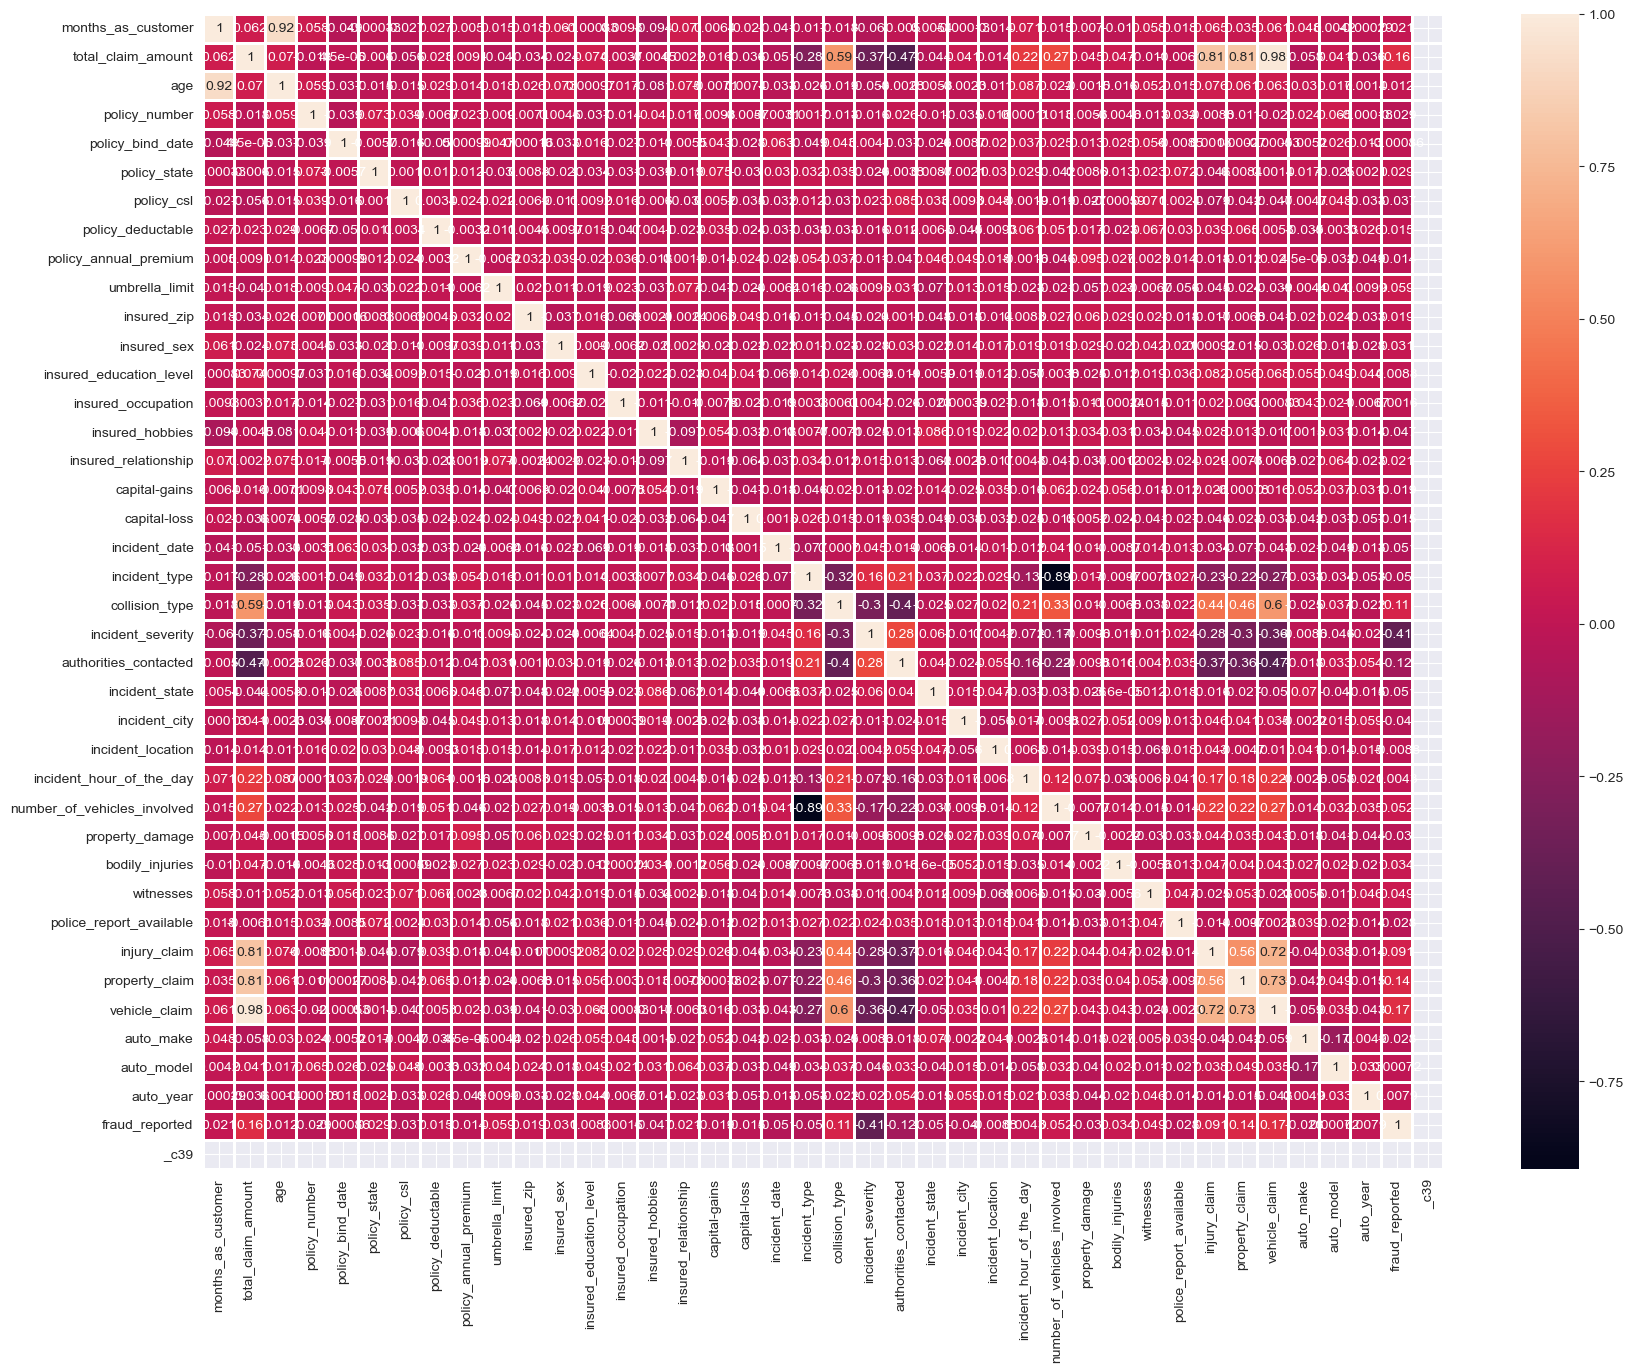

In [13]:
plt.figure(figsize = (20, 15))
sns.heatmap(data = data_raw.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [34]:
corrs = data_raw.corr()['fraud_reported']
columns = corrs[corrs > .0001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
Name: fraud_reported, dtype: float64

In [35]:
print(columns)

Index(['months_as_customer', 'total_claim_amount', 'age', 'policy_state',
       'policy_deductable', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'collision_type', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')


In [36]:
data_new = data_raw[columns].copy()
data_new.to_csv('../data/processed/insurance_claims.csv', index=False)

In [37]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   months_as_customer           1000 non-null   int64
 1   total_claim_amount           1000 non-null   int64
 2   age                          1000 non-null   int64
 3   policy_state                 1000 non-null   int32
 4   policy_deductable            1000 non-null   int64
 5   umbrella_limit               1000 non-null   int64
 6   insured_zip                  1000 non-null   int64
 7   insured_sex                  1000 non-null   int32
 8   insured_education_level      1000 non-null   int32
 9   insured_occupation           1000 non-null   int32
 10  insured_relationship         1000 non-null   int64
 11  collision_type               1000 non-null   int32
 12  incident_hour_of_the_day     1000 non-null   int64
 13  number_of_vehicles_involved  1000 non-null   int6

In [38]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   total_claim_amount           1000 non-null   int64  
 2   age                          1000 non-null   int64  
 3   policy_number                1000 non-null   int64  
 4   policy_bind_date             1000 non-null   int32  
 5   policy_state                 1000 non-null   int32  
 6   policy_csl                   1000 non-null   int32  
 7   policy_deductable            1000 non-null   int64  
 8   policy_annual_premium        1000 non-null   float64
 9   umbrella_limit               1000 non-null   int64  
 10  insured_zip                  1000 non-null   int64  
 11  insured_sex                  1000 non-null   int32  
 12  insured_education_level      1000 non-null   int32  
 13  insured_occupation 